# Visualization Techniques (wordclouds)

## Venustiano Soancatl Aguilar
### Center for Information Technology
### University of Groningen, the Netherlands

### Wordclouds

- The most frequent words stand out better in a word cloud
- Easy to understand
- Better than text table data

[How to Generate Word Clouds in R](https://towardsdatascience.com/create-a-word-cloud-with-r-bde3e7422e8a)

[Text mining and word cloud fundamentals in R](http://www.sthda.com/english/wiki/text-mining-and-word-cloud-fundamentals-in-r-5-simple-steps-you-should-know)

[Generating Word Cloud in Python](https://www.geeksforgeeks.org/generating-word-cloud-python/)

[Generating WordClouds in Python](https://www.datacamp.com/community/tutorials/wordcloud-python)


- Data handling/reshaping skills open infinite possibilities

### Data preprocessing

In [1]:
# Importing the package
import pandas as pd
# Loading and displaying the data
tableRes = pd.read_csv('data/results.txt',sep=' ')
# Reshaping the data (long format)
longTable = pd.melt(tableRes, id_vars=['iSubj','trial','Age','Decade'], 
                    var_name='myVars')
# Normalizing the data
longTable["normVal"]=longTable.groupby('myVars').transform(
    lambda value: (value - value.mean()) / value.std())["value"]
longTable.head()

,iSubj,trial,Age,Decade,myVars,value,normVal
0,1,1,76,7,medLrms51,0.189493,-0.406276
1,1,2,76,7,medLrms51,0.204152,-0.168225
2,1,3,76,7,medLrms51,0.217347,0.046049
3,1,4,76,7,medLrms51,0.169569,-0.729817
4,1,5,76,7,medLrms51,0.170786,-0.710069


### Converting values to strings

In [2]:
longTable['strValues'] = longTable['normVal'].round(2).astype(str)
longTable

,iSubj,trial,Age,Decade,myVars,value,normVal,strValues
0,1,1,76,7,medLrms51,0.189493,-0.406276,-0.41
1,1,2,76,7,medLrms51,0.204152,-0.168225,-0.17
2,1,3,76,7,medLrms51,0.217347,0.046049,0.05
3,1,4,76,7,medLrms51,0.169569,-0.729817,-0.73
4,1,5,76,7,medLrms51,0.170786,-0.710069,-0.71
...,...,...,...,...,...,...,...,...
4395,40,6,58,5,medLsdD51,0.079016,-1.090094,-1.09
4396,40,7,58,5,medLsdD51,0.050360,-2.066097,-2.07
4397,40,8,58,5,medLsdD51,0.079460,-1.074982,-1.07
4398,40,9,58,5,medLsdD51,0.075648,-1.204796,-1.2


In [3]:
len(longTable['strValues'].unique())

522

### Activating R magic


In [4]:
%load_ext rpy2.ipython

/opt/conda/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


### Installing `wordcloud2`

In [5]:
%%R
install.packages("wordcloud2",repos = "http://cran.us.r-project.org")
library(wordcloud2)

R[write to console]: trying URL 'http://cran.us.r-project.org/src/contrib/wordcloud2_0.2.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1849493 bytes (1.8 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to

### Installing `ggwordcloud`

In [6]:
%%R
install.packages("ggwordcloud",repos = "http://cran.us.r-project.org")
library(ggwordcloud)

R[write to console]: trying URL 'http://cran.us.r-project.org/src/contrib/ggwordcloud_0.5.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 902025 bytes (880 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to

### Frequency of words

### Word frequency

In [8]:
%%R -i longTable
library(data.table)
lt = as.data.table(longTable)
dft = lt[, .N, by=.(strValues)]
dft

     strValues  N
  1:     -0.41 16
  2:     -0.17 17
  3:      0.05 15
  4:     -0.73 17
  5:     -0.71 13
 ---             
518:     -2.32  1
519:      -2.4  1
520:     -2.19  1
521:     -2.36  1
522:     -2.49  1


### The plot

R[write to console]: Some words could not fit on page. They have been removed.



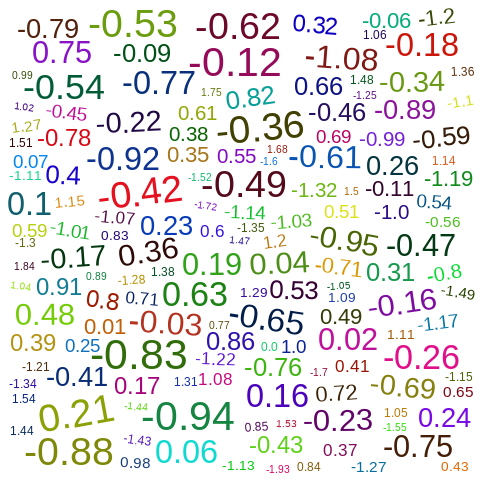

In [10]:
%%R
#https://community.rstudio.com/t/saving-word-cloud-to-local-disk/12279/4
library("htmlwidgets")
p <- wordcloud2(dft[,c("strValues","N")],size =0.7,shape = "pentagon")
saveWidget(p,"tmp.html",selfcontained = F) 
ggwordcloud2(dft[N>5,c("strValues","N")],shape = "pentagon")

### Installing wordcloud `python` 

In [11]:
!pip install wordcloud

### Loading some data

In [12]:
names = pd.read_csv('./data/names.csv',header=None)
names

,0
0,Dirck
1,Jan
2,Reyer
3,Cornelis
4,Symon
...,...
2968,Reynnout
2969,Kateleyne
2970,Anneke
2971,Claes


In [13]:
text = " ".join(name for name in names[0])
text

'Dirck Jan Reyer Cornelis Symon Willen Jannitgen Cornelis Maertijn Willem IJzaeck Jan Willem Lambrecht Heynderick Dirck Adrijaen Vranck Allert Jacob Pieter Werrenaer Reyer Claes Ghijsbert Jan Jacob Pieter Jan Willem Louwen Mees Willem Maritgen Quyerijn Cornelis Andries Louweris Jan Maritgen Jan Dirck Heyl Maritgen Claes Aefgen Cornelis Jan Jacob Trijntgen Jan Jan Gherijtgen Maritgen Ghertgen Ever Gheertgen Cornelis Pieter Jannitgen Dirck Pieter Steven Harmen Willem Cornelis Maritgen Jacob Maritgen Huych Steven Foeyt Pieter Nijclaes Maritgen Cornelis Jacob IJde Dirck Claes Heynderick Heynrick Vrederick Jacob Pietertgen Odt Niesgen Pieter Dominicues Frans Adrijaen Imme Lijbet Jacob Neeltgen Gherijt Anne Maritgen Maritgen Machteltgen Dorite Symon Huych Maritgen Jacob Adrijaen Meynsgen Lysbet Allert Adrijaen Haesgen Adriaen Pieter Jacob Andries Jan Govert Oude Jan Tryntgen Adriaen Neeltge Claes Quyryna Marry Adriaen Tryntgen Marritgen Marritgen Pouwels Rusgen Tryn Gerrit Heynrick Jan Jan A

### Saving the wordcloud

In [14]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
wordcloud = WordCloud(background_color="white",width=900,height=600).generate(text)
wordcloud.to_file("./images/names_wordcloud.png",)

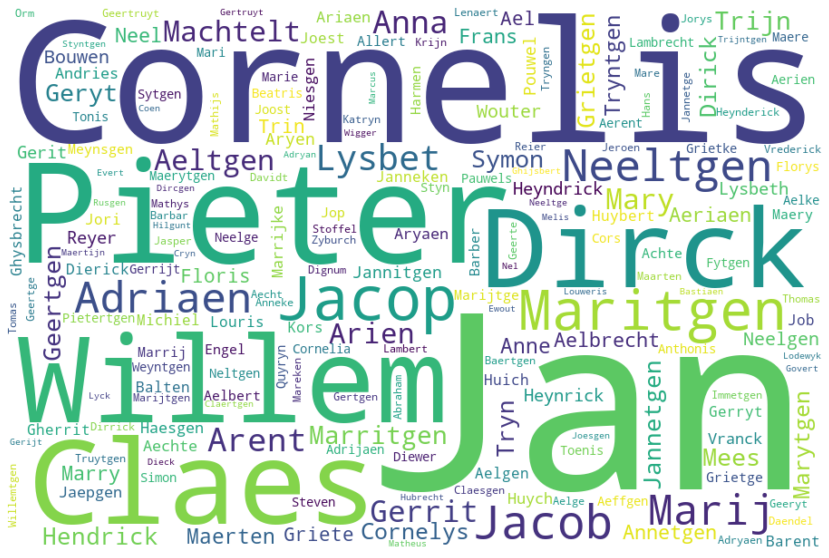

In [16]:
plt.figure(figsize=[15,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.savefig('../data/names_wordcloud_matplotlib.png')
plt.show()

### End of wordclouds